In [174]:
import pandas as pd 
import torch 
import matplotlib.pyplot as plt
import numpy as np 

Посмотрим на данные значений биткоина с 2010 по 2020

In [175]:
usd_to_btc_df = pd.read_csv('btcusd_full_hour_2020_02_01.csv')
usd_to_btc_df.tail(3)

,date,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,avg
82038,2020-02-01 12:00:00,1580558400,9357.83,9296.57,9345.54,921.06,8589207.24,9304.36,direct,NaN,9327.200
82039,2020-02-01 13:00:00,1580562000,9362.24,9299.17,9304.36,621.57,5807615.68,9344.54,direct,NaN,9330.705
82040,2020-02-01 14:00:00,1580565600,9345.18,9301.96,9344.54,448.02,4172322.40,9309.57,direct,NaN,9323.570


from  2013-03-01 06:00:00
to  2014-06-22 14:00:00


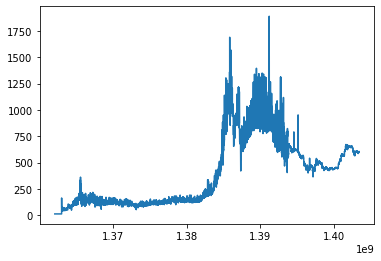

In [176]:
# from 0 to 1
start = int(0.26 * len(usd_to_btc_df['avg']))
stop = int(0.4 * len(usd_to_btc_df['avg']))
plt.plot(usd_to_btc_df['time'][start:stop], usd_to_btc_df['avg'][start:stop])
print("from ",usd_to_btc_df['date'][start])
print("to ",usd_to_btc_df['date'][stop])

Эмпирически выяснили, что вся движуха началась только после примерно 2013-03-01 06:00:00
Остальные данные неинтересны, потому что всем было все равно

#Определим сеть

In [187]:
from torch import nn
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(10,5)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(5,5)
        self.act2 = nn.Sigmoid()
        self.fc3 = nn.Linear(5,2)
        self.act3 = nn.Sigmoid()
        self.fc4 = nn.Linear(2,1)
        self.act4 = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.act4(x) * 1e6
        return x

Обучение

In [193]:
import time
def generate_batch_data(device, x, y, batch_size):
    dataset = torch.utils.data.TensorDataset(x.to(device), y.to(device))
    loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=False)

    for batch, [x_batch, y_batch] in enumerate(loader, 1):
        yield x_batch, y_batch, batch
        
model = Perceptron()
device = torch.device('cpu')
batch_size = 25
n_epochs= 50
verbose=True
train_losses = []

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_function = torch.nn.L1Loss()


x_train = [ usd_to_btc_df['avg'][i + 10:i + 20].to_list() for i, item in enumerate(usd_to_btc_df['avg'][10:-10])]
x_train = np.array(x_train, dtype=np.float32)
x_train = torch.from_numpy(x_train)

y_train = usd_to_btc_df['avg'][10:-10].to_list()
y_train = np.array(y_train, dtype=np.float32)
y_train = torch.from_numpy(y_train)
print(x_train.size(), y_train.size())

torch.Size([82021, 10]) torch.Size([82021])


In [194]:
model.train()
for epoch in range(n_epochs):
    start_time = time.time()

    train_loss = 0
    batch = 0
    for x_batch, y_batch, batch in generate_batch_data(device, x_train, y_train, batch_size):
        # y_pred = self.model(x_batch)
        
        y_pred = model(x_batch)

        optimizer.zero_grad()
        loss = loss_function(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= batch
    train_losses.append(train_loss)

    elapsed = time.time() - start_time
    if True:
        print(f"Epoch {str(epoch + 1):>02}"
                f" Train loss: {train_loss:.4f}."
                # f" Validation loss: {self.val_losses[-1]:.4f}."
                f" Elapsed time: {elapsed:.2f}s.")

/Users/petrlarockin/Library/Python/3.8/lib/python/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/Users/petrlarockin/Library/Python/3.8/lib/python/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([21])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 01 Train loss: 314419.8901. Elapsed time: 2.85s.
Epoch 02 Train loss: 163597.7445. Elapsed time: 2.82s.
Epoch 03 Train loss: 76505.7298. Elapsed time: 2.80s.
Epoch 04 Train loss: 33231.5222. Elapsed time: 2.79s.
Epoch 05 Train loss: 14491.1641. Elapsed time: 2.78s.
Epoch 06 Train loss: 6768.0226. Elapsed time: 2.76s.
Epoch 07 Train loss: 4409.9092. Elapsed time: 2.78s.
Epoch 08 Train loss: 3400.5917. Elapsed time: 2.78s.
Epoch 09 Train loss: 2927.2490. Elapsed time: 2.76s.
Epoch 10 Train loss: 2611.3470. Elapsed time: 2.78s.
Epoch 11 Train loss: 2396.4376. Elapsed time: 2.78s.
Epoch 12 Train loss: 2275.9312. Elapsed time: 2.76s.
Epoch 13 Train loss: 2203.8029. Elapsed time: 2.76s.
Epoch 14 Train loss: 2173.5887. Elapsed time: 2.75s.
Epoch 15 Train loss: 2160.8454. Elapsed time: 2.78s.
Epoch 16 Train loss: 2155.6360. Elapsed time: 2.76s.
Epoch 17 Train loss: 2148.2789. Elapsed time: 2.77s.
Epoch 18 Train loss: 2144.2838. Elapsed time: 2.77s.
Epoch 19 Train loss: 2142.9664. Elapsed

Давайте посмотрим как можно использовать эту модель

In [182]:
usd_to_btc_Binance = pd.read_csv('Binance_BTCUSDT_1h.csv')
usd_to_btc_Binance = usd_to_btc_Binance.iloc[::-1] 
usd_to_btc_Binance.tail()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
4,1.646078e+12,2022-02-28 20:00:00,BTC/USDT,41329.44,41950.00,41248.41,41908.07,3794.77339,1.579844e+08,100504.0
3,1.646082e+12,2022-02-28 21:00:00,BTC/USDT,41908.08,41918.02,41500.56,41644.99,1373.72185,5.721327e+07,47247.0
2,1.646086e+12,2022-02-28 22:00:00,BTC/USDT,41645.00,44225.84,41628.99,43026.44,8825.95745,3.815874e+08,309998.0
1,1.646089e+12,2022-02-28 23:00:00,BTC/USDT,43026.45,43346.92,42847.00,43160.00,4081.96888,1.760338e+08,110413.0
0,1.646093e+12,2022-03-01 00:00:00,BTC/USDT,43160.00,43608.00,43155.68,43305.94,1307.55917,5.674319e+07,35501.0


Разница в модуле между реальными и предсказанными данными

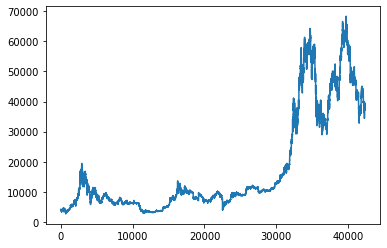

In [183]:
x_test = [ usd_to_btc_Binance['open'][i + 10:i + 20].to_list() for i, item in enumerate(usd_to_btc_Binance['open'][10:-10])]
x_test = np.array(x_test, dtype=np.float32)
x_test = torch.from_numpy(x_test)

y_test = usd_to_btc_Binance['open'][10:-10].to_list()
y_test = np.array(y_test, dtype=np.float32)
y_test = torch.from_numpy(y_test)

model.eval()
difference = torch.abs(model(x_test) - y_test).detach().numpy()
plt.plot(range(len(difference)), difference)

Система принятия решения

In [210]:
# state=False SELL
# state=True BUY
def decision_making_system(model, data):
    if len(data) != 10:
        raise Exception("Only 10 numbers")
    output = model(data)[0]
    new_state = output > data[-1]
    decision = new_state
    return decision

Попробуем поторговать

In [216]:
trade_period = x_test[:50]
decisions = [bool(decision_making_system(model, data).item()) for data in trade_period]


In [226]:
last_price = x_test[0][0]
profit = []
state = True
# print(last_price)
for i, new_state in enumerate(decisions):
    new_price = trade_period[i][-1].item()
    if new_state == False and state == True:
        profit.append(new_price - last_price)
    state = new_state
profit = list(map(lambda prof: float(prof),profit))
print(profit)
import functools
print("total profit is $", functools.reduce((lambda a, b: a + b),profit))

[-122.2001953125]
total profit is $ -122.2001953125
